In [1]:
import pandas as pd
import datetime
import calendar
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import numpy as np

In [2]:
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")
train_df = pd.read_csv("train.csv")

In [3]:
seasons_dict = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}

In [4]:
master_df = train_df.merge(stores_df, on='Store', how='left')
master_df = master_df.merge(features_df, on=['Store', 'Date'], how='left')

In [5]:
master_df['MarkDown1'] = master_df['MarkDown1'].fillna(0)
master_df['MarkDown2'] = master_df['MarkDown2'].fillna(0)
master_df['MarkDown3'] = master_df['MarkDown3'].fillna(0)
master_df['MarkDown4'] = master_df['MarkDown4'].fillna(0)
master_df['MarkDown5'] = master_df['MarkDown5'].fillna(0)
master_df['isHoliday'] = master_df['IsHoliday_x']
master_df = master_df.drop(columns=['IsHoliday_x', 'IsHoliday_y'])
master_df['Date'] = pd.to_datetime(master_df['Date'], format='%Y-%m-%d')
master_df['Week_Number'] = master_df['Date'].dt.week
master_df['Quarter'] = master_df['Date'].dt.quarter
master_df['Month'] = master_df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
master_df['Season'] = (master_df['Date'].apply(lambda dt: (dt.month%12 + 3)//3)).map(seasons_dict)

In [6]:
master_df.head()

Store  Dept       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50    A  151315        42.31       2.572   
1      1     1 2010-02-12      46039.49    A  151315        38.51       2.548   
2      1     1 2010-02-19      41595.55    A  151315        39.93       2.514   
3      1     1 2010-02-26      19403.54    A  151315        46.63       2.561   
4      1     1 2010-03-05      21827.90    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployment  isHoliday  Week_Number  Quarter Month  Season  
0         8.106      False            5        1   Feb  Winter  
1         8.106       True            6        1   Feb  Winter  
2         8.106      False            7        1   Feb  Winter  
3         8.106      False            8        1   Feb  Winter  
4         8.106      False            9        1   Mar  Winter

In [7]:
master_df = master_df.join(pd.get_dummies(master_df['Quarter'], prefix='Quarter'))

In [8]:
master_df.head()

Store  Dept       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50    A  151315        42.31       2.572   
1      1     1 2010-02-12      46039.49    A  151315        38.51       2.548   
2      1     1 2010-02-19      41595.55    A  151315        39.93       2.514   
3      1     1 2010-02-26      19403.54    A  151315        46.63       2.561   
4      1     1 2010-03-05      21827.90    A  151315        46.50       2.625   

   MarkDown1  MarkDown2    ...     Unemployment  isHoliday  Week_Number  \
0        0.0        0.0    ...            8.106      False            5   
1        0.0        0.0    ...            8.106       True            6   
2        0.0        0.0    ...            8.106      False            7   
3        0.0        0.0    ...            8.106      False            8   
4        0.0        0.0    ...            8.106      False            9   

   Quarter  Month  Season  Quarter_1  Quarter_2 Quarter_3 Quarter_4  
0        1    Feb  Winter          1          0         0         0  
1        1    Feb  Winter          1          0         0         0  
2        1    Feb  Winter          1          0         0         0  
3        1    Feb  Winter          1          0         0         0  
4        1    Mar  Winter          1          0         0         0  

[5 rows x 24 columns]

In [9]:
result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 2)]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.315
Date:                Wed, 18 Jul 2018   Prob (F-statistic):            0.00786
Time:                        15:47:49   Log-Likelihood:            -1.2106e+05
No. Observations:               10238   AIC:                         2.421e+05
Df Residuals:                   10226   BIC:                         2.422e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.084e-06   2.95e-0

In [18]:
master_df.describe()
#master_df.to_csv("master.csv")

Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       60.090059       3.361027    2590.074819     879.974298   
std        18.447931       0.458515    6052.385934    5084.538801   
min        -2.060000       2.472000       0.000000    -265.760000   
25%        46.680000       2.933000       0.000000       0.000000   
50%        62.090000       3.452000       0.000000       0.000000   
75%        74.280000       3.738000    2809.050000       2.200000   
max       100.140000       4.468000   88646.760000  104519.540000   

           MarkDown3      MarkDown4      MarkDown5            CPI  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean      468.087665    1083.132268    1662.772385     171.201947   
std      5528.873453    3894.529945    4207.629321      39.159276   
min       -29.100000       0.000000       0.000000     126.064000   
25%         0.000000       0.000000       0.000000     132.022667   
50%         0.000000       0.000000       0.000000     182.318780   
75%         4.540000     425.290000    2168.040000     212.416993   
max    141630.610000   67474.850000  108519.280000     227.232807   

        Unemployment    Week_Number        Quarter      Quarter_1  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        7.960289      25.826762       2.482767       0.231331   
std         1.863296      14.151887       1.071341       0.421684   
min         3.879000       1.000000       1.000000       0.000000   
25%         6.891000      14.000000       2.000000       0.000000   
50%         7.866000      26.000000       2.000000       0.000000   
75%         8.572000      38.000000       3.000000       0.000000   
max        14.313000      52.000000       4.000000       1.000000   

           Quarter_2      Quarter_3      Quarter_4  
count  421570.000000  421570.000000  421570.000000  
mean        0.272275       0.278692       0.217703  
std         0.445131       0.448356       0.412685  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         1.000000       1.000000       0.000000  
max         1.000000       1.000000       1.000000

In [11]:
result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 1)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 2)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 3)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 4)]).fit()
print(result.summary())

result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 5)]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.290
Date:                Wed, 18 Jul 2018   Prob (F-statistic):              0.223
Time:                        15:47:50   Log-Likelihood:            -1.1933e+05
No. Observations:               10244   AIC:                         2.387e+05
Df Residuals:                   10232   BIC:                         2.388e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.766e-07    2.2e-0

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.493
Date:                Wed, 18 Jul 2018   Prob (F-statistic):              0.126
Time:                        15:47:50   Log-Likelihood:                -93713.
No. Observations:                8999   AIC:                         1.874e+05
Df Residuals:                    8987   BIC:                         1.875e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.904e-06   1.94e-0

In [12]:
master_df[(master_df['Store'] == 1) & (master_df['Quarter'] == 1)].describe()

Store         Dept   Weekly_Sales      Size  Temperature   Fuel_Price  \
count  2376.0  2376.000000    2376.000000    2376.0  2376.000000  2376.000000   
mean      1.0    44.225589   21502.405274  151315.0    52.258258     3.157235   
std       0.0    29.741929   27384.514596       0.0     9.174786     0.388876   
min       1.0     1.000000    -863.000000  151315.0    35.400000     2.514000   
25%       1.0    19.750000    3447.550000  151315.0    45.320000     2.976000   
50%       1.0    37.500000   10889.605000  151315.0    53.560000     3.157000   
75%       1.0    72.000000   30289.552500  151315.0    58.760000     3.473000   
max       1.0    99.000000  158241.980000  151315.0    69.970000     3.845000   

          MarkDown1     MarkDown2    MarkDown3     MarkDown4    MarkDown5  \
count   2376.000000   2376.000000  2376.000000   2376.000000  2376.000000   
mean    3966.692420   1961.729949    17.343779   2544.977243  1900.700013   
std     7067.545476   4495.325962    39.701227   7051.589770  2788.900007   
min        0.000000      0.000000     0.000000      0.000000     0.000000   
25%        0.000000      0.000000     0.000000      0.000000     0.000000   
50%        0.000000      0.000000     0.000000      0.000000     0.000000   
75%     6118.560000   1082.740000     9.800000    671.430000  3402.660000   
max    34577.060000  21813.160000   160.530000  32403.870000  8483.000000   

               CPI  Unemployment  Week_Number  Quarter  Quarter_1  Quarter_2  \
count  2376.000000   2376.000000  2376.000000   2376.0     2376.0     2376.0   
mean    215.531776      7.676141     7.185185      1.0        1.0        0.0   
std       4.143648      0.298330     3.417264      0.0        0.0        0.0   
min     211.018042      7.348000     1.000000      1.0        1.0        0.0   
25%     211.404742      7.348000     5.000000      1.0        1.0        0.0   
50%     213.823333      7.742000     7.000000      1.0        1.0        0.0   
75%     220.172015      7.742000    10.000000      1.0        1.0        0.0   
max     221.361012      8.106000    13.000000      1.0        1.0        0.0   

       Quarter_3  Quarter_4  
count     2376.0     2376.0  
mean         0.0        0.0  
std          0.0        0.0  
min          0.0        0.0  
25%          0.0        0.0  
50%          0.0        0.0  
75%          0.0        0.0  
max          0.0        0.0

In [13]:
week_array = []
store_array = []

for i in range(1, 46):
    store_array.append(i)
total_stores_sales = {}

for i in range(1, 46):
    week_array.append(i)
    current_store_array = []
    for j in range(1, 53):
        current_dp = master_df[(master_df['Store'] == i) & (master_df['Week_Number'] == j)]
        sales_array = current_dp['Weekly_Sales'].tolist()
        sum_sales = 0
        for k in range(1, len(sales_array)):
            sum_sales = sum_sales + sales_array[k]
        current_store_array.append(sum_sales)
    total_stores_sales[i] = current_store_array

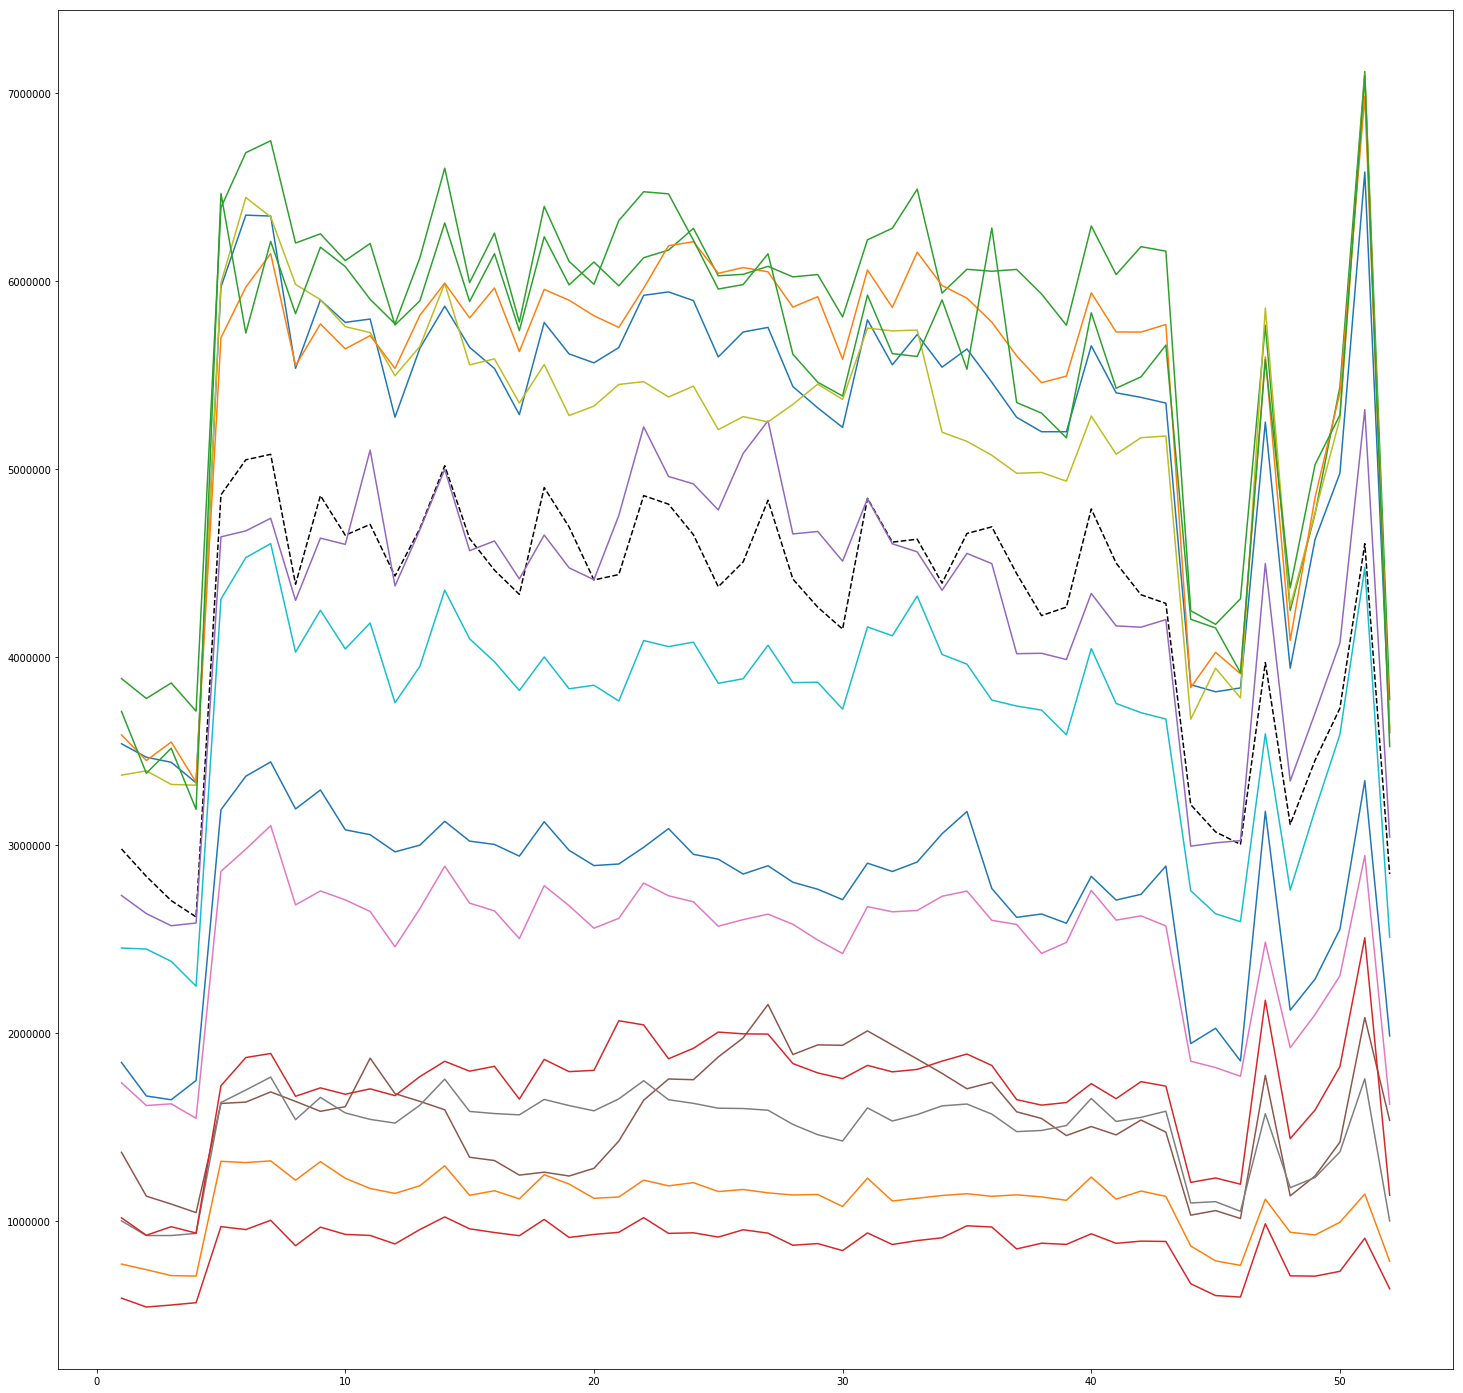

In [19]:
store_array = []
for i in range(1, 53):
    store_array.append(i)

#for i in range(1, 46):
    #total_stores_sales[i].pop(0)
    
plt.plot(store_array,total_stores_sales[1],"k--")
plt.plot(store_array,total_stores_sales[2])
plt.plot(store_array,total_stores_sales[3])
plt.plot(store_array,total_stores_sales[4])
plt.plot(store_array,total_stores_sales[5])
plt.plot(store_array,total_stores_sales[6])
plt.plot(store_array,total_stores_sales[7])
plt.plot(store_array,total_stores_sales[8])
plt.plot(store_array,total_stores_sales[9])
plt.plot(store_array,total_stores_sales[10])
plt.plot(store_array,total_stores_sales[11])
plt.plot(store_array,total_stores_sales[12])
plt.plot(store_array,total_stores_sales[13])
plt.plot(store_array,total_stores_sales[14])
plt.plot(store_array,total_stores_sales[15])

fig = plt.gcf()
fig.set_size_inches(25,25)
plt.show()

In [16]:
print(total_stores_sales[2][1])

3466759.32


In [22]:
weekly_total_array = []

for i in range(52):
    weekly_sum = 0
    for j in range(1, 46):
        weekly_sum = weekly_sum + total_stores_sales[j][i]
    weekly_total_array.append(weekly_sum)
    
print(weekly_total_array)

[87207935.44000001, 82123863.94999997, 82111755.27, 78782339.45, 141107626.29999998, 144225095.94000003, 146071957.49999994, 133184545.96, 139950456.44, 137229283.09, 135916119.07999998, 130958230.25999998, 136703731.92999998, 145236126.29000002, 136176536.90999997, 137895177.51000002, 130351802.38000001, 141820036.94, 137035191.81000006, 135357540.22, 140299894.08, 146593793.20999998, 144498562.74000004, 142816534.57, 139513219.76, 142414153.89000002, 146374081.85, 137211558.90999997, 135591498.90999994, 131776493.19999999, 143064226.45000002, 139492566.94, 140724032.85999998, 140164518.32999998, 139085059.64999998, 140047934.25, 130392878.93000004, 127720867.82, 127406445.66, 138991766.96, 132671122.41000004, 132877323.61999999, 133241687.89000002, 93093042.81000003, 93961127.03999996, 90883180.69999997, 131682585.43, 98358609.67, 109939927.62, 120117751.87, 155697302.7, 85853804.95]


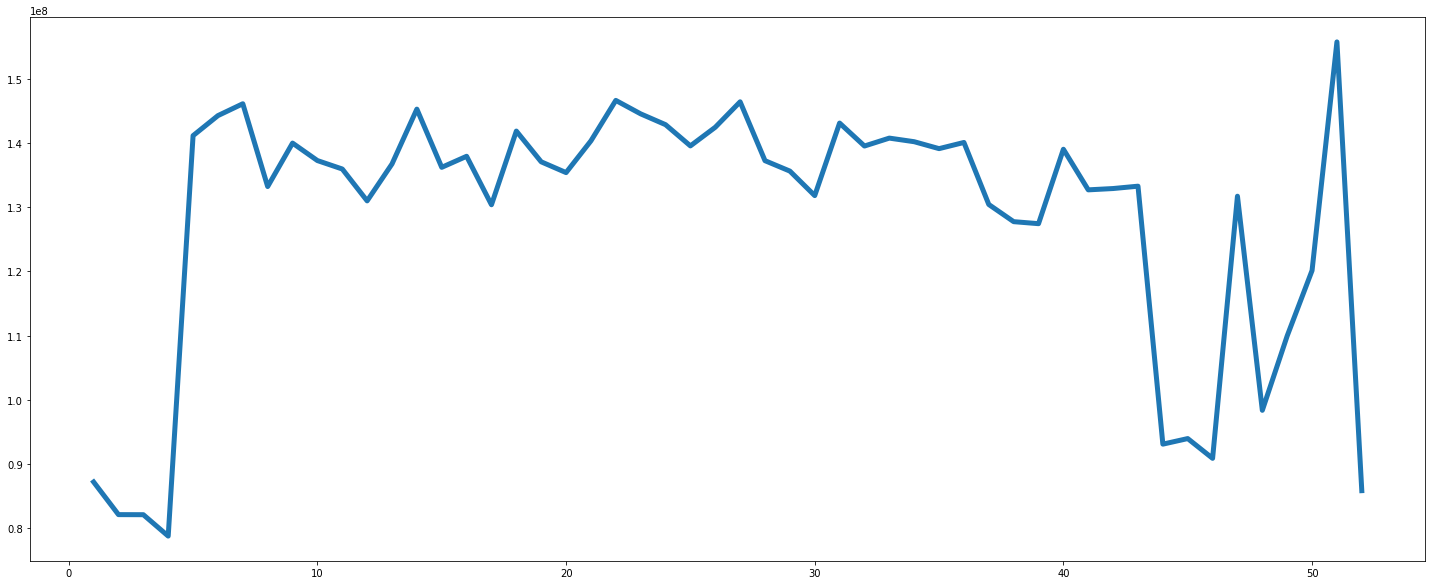

In [26]:
plt.plot(store_array,weekly_total_array, linewidth = 5)
fig = plt.gcf()
fig.set_size_inches(25,10)
plt.show()

In [37]:
sales_dict = {}
for store in range(1, 46):
    for dept in range(1, 100):
        current_key = str(store) + "," + str(dept)
        sales_dict[current_key] = 0

In [41]:
result = sm.ols(formula="Weekly_Sales ~ isHoliday + Fuel_Price + Temperature + Size + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + CPI + Unemployment + Week_Number", data=master_df[(master_df['Store'] == 1) & (master_df['Dept'] == 1)]).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     4.528
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           8.49e-06
Time:                        17:14:27   Log-Likelihood:                -1494.3
No. Observations:                 143   AIC:                             3013.
Df Residuals:                     131   BIC:                             3048.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -9.032e-07   5.87e-06     -0.154      0.878   -1.25e-05    1.07e-05
isHoliday[T.True]  -144.8330   3236.662     -0.045      0.964   -6547.722    6258.056
Fuel_Price         1821.3247   3268.271      0.557      0.578   -4644.094    8286.743
Temperature        -408.5091     61.686     -6.622      0.000    -530.539    -286.479
Size                 -0.1367      0.888     -0.154      0.878      -1.893       1.620
MarkDown1             0.1410      0.288      0.490      0.625      -0.428       0.710
MarkDown2            -0.2022      0.186     -1.088      0.279      -0.570       0.166
MarkDown3            -0.1604      0.171     -0.937      0.351      -0.499       0.178
MarkDown4             0.0411      0.321      0.128      0.898      -0.594       0.676
MarkDown5            -0.5835      0.366     -1.592      0.114      -1.308       0.142
CPI                 224.0355    555.419      0.403      0.687    -874.716    1322.787
Unemployment       1883.8868   3836.450      0.491      0.624   -5705.526    9473.299
Week_Number         129.3682     60.724      2.130      0.035       9.241     249.495
==============================================================================
Omnibus:                       73.825   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.640
Skew:                           2.014   Prob(JB):                     1.13e-56
Kurtosis:                       8.197   Cond. No.                     7.86e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
for store in range(1, 46):
    week_array.append(i)
    current_store_array = []
    for dept in range(1, 100):
        for j in range(1, 53):
            current_dp = master_df[(master_df['Store'] == store) & (master_df['Dept'] == dept) & (master_df['Week_Number'] == j)]
            sales_array = current_dp['Weekly_Sales'].tolist()
            sum_sales = 0
            for k in range(1, len(sales_array)):
                sum_sales = sum_sales + sales_array[k]
            current_key = str(store) + "," + str(dept)
            print(current_key)
            sales_dict[current_key] = sum_sales

1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,2
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,4
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5
1,5


1,34
1,34
1,34
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,35
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,36
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,37
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38
1,38


1,66
1,66
1,66
1,66
1,66
1,66
1,66
1,66
1,66
1,66
1,66
1,66
1,66
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,67
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,68
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,69
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70
1,70


1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
1,99
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,1
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,2
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,3
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2,4
2

2,33
2,33
2,33
2,33
2,33
2,33
2,33
2,33
2,33
2,33
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,34
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,35
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,36
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37
2,37


2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,65
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,66
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,67
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,68
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69
2,69


2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,97
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,98
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
2,99
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,1
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3,2
3

3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,32
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,33
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,34
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,35
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36
3,36


3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,64
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,65
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,66
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,67
3,68
3,68
3,68


3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,96
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,97
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,98
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
3,99
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1
4,1

4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,31
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,32
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,33
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34
4,34


4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,62
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,63
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,64
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,65
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66
4,66


4,94
4,94
4,94
4,94
4,94
4,94
4,94
4,94
4,94
4,94
4,94
4,94
4,94
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,95
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,96
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,97
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98
4,98


5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,29
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,30
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,31
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32
5,32


5,60
5,60
5,60
5,60
5,60
5,60
5,60
5,60
5,60
5,60
5,60
5,60
5,60
5,60
5,60
5,60
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,61
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,62
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,63
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64
5,64


5,92
5,92
5,92
5,92
5,92
5,92
5,92
5,92
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,93
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,94
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,95
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96
5,96


6,27
6,27
6,27
6,27
6,27
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,28
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,29
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,30
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31
6,31


6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,59
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,60
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,61
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,62
6,63
6,63
6,63
6,63
6,63
6,63
6,63
6,63
6,63
6,63
6,63
6,63
6,63
6,63
6,63
6,63
6,63


6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,91
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,92
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,93
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,94
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95
6,95


7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,26
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,27
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,28
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29
7,29


7,57
7,57
7,57
7,57
7,57
7,57
7,57
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,58
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,59
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,60
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61
7,61


7,89
7,89
7,89
7,89
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,90
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,91
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,92
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93
7,93


8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,24
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,25
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,26
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,27
8,28
8,28
8,28
8,28
8,28


8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,56
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,57
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,58
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,59
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60
8,60


8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,88
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,89
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,90
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,91
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92
8,92


9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,23
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,24
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,25
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,26
9,27
9,27
9,27
9,27
9,27
9,27
9,27
9,27
9,27
9,27
9,27


9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,55
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,56
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,57
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,58
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59
9,59


9,87
9,87
9,87
9,87
9,87
9,87
9,87
9,87
9,87
9,87
9,87
9,87
9,87
9,87
9,87
9,87
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,88
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,89
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,90
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91
9,91


10,18
10,18
10,18
10,18
10,18
10,18
10,18
10,18
10,18
10,18
10,18
10,18
10,18
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,19
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,20
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,21
10,2

10,45
10,45
10,45
10,45
10,45
10,45
10,45
10,45
10,45
10,45
10,45
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,46
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,47
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,48
10,4

10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,72
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,73
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,74
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,75
10,7

10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
10,99
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,1
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,2
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,3
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4
11,4


11,28
11,28
11,28
11,28
11,28
11,28
11,28
11,28
11,28
11,28
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,29
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,30
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,31
11,3

11,55
11,55
11,55
11,55
11,55
11,55
11,55
11,55
11,55
11,55
11,55
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,56
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,57
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,58
11,5

11,82
11,82
11,82
11,82
11,82
11,82
11,82
11,82
11,82
11,82
11,82
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,83
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,84
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,85
11,8

12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,11
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,12
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,13
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,14
12,1

12,38
12,38
12,38
12,38
12,38
12,38
12,38
12,38
12,38
12,38
12,38
12,38
12,38
12,38
12,38
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,39
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,40
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,41
12,4

12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,65
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,66
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,67
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,68
12,6

12,91
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,92
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,93
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,94
12,95
12,95
12,95
12,95
12,95
12,95
12,95
12,95
12,95
12,9

13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,21
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,22
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,23
13,24
13,24
13,24
13,24
13,24
13,24
13,24
13,24
13,24
13,24
13,24
13,24
13,24
13,24
13,2

13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,48
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,49
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,50
13,51
13,51
13,51
13,51
13,51
13,51
13,51
13,51
13,51
13,51
13,51
13,51
13,51
13,5

13,74
13,74
13,74
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,75
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,76
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,77
13,78
13,78
13,78
13,78
13,78
13,78
13,78
13,7

14,2
14,2
14,2
14,2
14,2
14,2
14,2
14,2
14,2
14,2
14,2
14,2
14,2
14,2
14,2
14,2
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,3
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,4
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,5
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6
14,6


14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,30
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,31
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,32
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,33
14,3

14,56
14,56
14,56
14,56
14,56
14,56
14,56
14,56
14,56
14,56
14,56
14,56
14,56
14,56
14,56
14,56
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,57
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,58
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,59
14,5

14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,83
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,84
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,85
14,86
14,86
14,86
14,86
14,86
14,86
14,86
14,86
14,86
14,86
14,86
14,86
14,86
14,86
14,8

15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,12
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,13
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,14
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,15
15,1

15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,38
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,39
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,40
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,41
15,4

15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,65
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,66
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,67
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,68
15,6

15,91
15,91
15,91
15,91
15,91
15,91
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,92
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,93
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,94
15,95
15,95
15,95
15,95
15,9

16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,21
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,22
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,23
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,24
16,2

16,47
16,47
16,47
16,47
16,47
16,47
16,47
16,47
16,47
16,47
16,47
16,47
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,48
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,49
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,50
16,5

16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,74
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,75
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,76
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,77
16,7

17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,2
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,3
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,4
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,5
17,6
17,6
17,6
17,6


17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,30
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,31
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,32
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,33
17,3

17,56
17,56
17,56
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,57
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,58
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,59
17,60
17,60
17,60
17,60
17,60
17,60
17,60
17,6

17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,83
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,84
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,85
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,86
17,8

18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,12
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,13
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,14
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,15
18,1

18,38
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,39
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,40
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,41
18,42
18,42
18,42
18,42
18,42
18,42
18,42
18,42
18,42
18,4

18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,65
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,66
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,67
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,68
18,6

18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,92
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,93
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,94
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,95
18,9

19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,21
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,22
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,23
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,24
19,2

19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,48
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,49
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,50
19,51
19,51
19,51
19,51
19,51
19,51
19,51
19,51
19,51
19,51
19,51
19,51
19,51
19,5

19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,74
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,75
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,76
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,77
19,7

20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,2
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,3
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,4
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,5
20,6
20,6
20,6
20,6
20,6
20,6
20,6
20,6
20,6
20,6
20,6
20,6
20,6


20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,30
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,31
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,32
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,33
20,3

20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,57
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,58
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,59
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,60
20,6

20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,84
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,85
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,86
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,87
20,8

21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,13
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,14
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,15
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,16
21,1

21,39
21,39
21,39
21,39
21,39
21,39
21,39
21,39
21,39
21,39
21,39
21,39
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,40
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,41
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,42
21,4

21,66
21,66
21,66
21,66
21,66
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,67
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,68
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,69
21,70
21,70
21,70
21,70
21,70
21,7

21,93
21,93
21,93
21,93
21,93
21,93
21,93
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,94
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,95
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,96
21,97
21,97
21,97
21,9

22,22
22,22
22,22
22,22
22,22
22,22
22,22
22,22
22,22
22,22
22,22
22,22
22,22
22,22
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,23
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,24
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,25
22,2

22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,49
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,50
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,51
22,52
22,52
22,52
22,52
22,52
22,52
22,52
22,52
22,52
22,52
22,52
22,52
22,52
22,52
22,52
22,52
22,5

22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,76
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,77
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,78
22,79
22,79
22,79
22,79
22,79
22,79
22,79
22,79
22,79
22,79
22,79
22,79
22,79
22,7

23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,4
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,5
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,6
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7
23,7


23,31
23,31
23,31
23,31
23,31
23,31
23,31
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,32
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,33
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,34
23,35
23,35
23,35
23,3

23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,58
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,59
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,60
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,61
23,6

23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,85
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,86
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,87
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,88
23,8

24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,15
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,16
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,17
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,18
24,1

24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,42
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,43
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,44
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,45
24,4

24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,69
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,70
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,71
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,72
24,7

24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,96
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,97
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,98
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,99
24,9

25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,25
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,26
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,27
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,28
25,2

25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,52
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,53
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,54
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,55
25,5

25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,79
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,80
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,81
25,82
25,82
25,82
25,82
25,82
25,82
25,82
25,82
25,82
25,82
25,82
25,82
25,82
25,82
25,82
25,82
25,8

26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,7
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,8
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,9
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,10
26,11
26,11
26,11
26,11
26,1

26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,34
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,35
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,36
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,37
26,3

26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,61
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,62
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,63
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,64
26,6

26,87
26,87
26,87
26,87
26,87
26,87
26,87
26,87
26,87
26,87
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,88
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,89
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,90
26,9

27,16
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,17
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,18
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,19
27,20
27,20
27,20
27,20
27,20
27,20
27,20
27,20
27,20
27,2

27,43
27,43
27,43
27,43
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,44
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,45
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,46
27,47
27,47
27,47
27,47
27,47
27,47
27,4

27,70
27,70
27,70
27,70
27,70
27,70
27,70
27,70
27,70
27,70
27,70
27,70
27,70
27,70
27,70
27,70
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,71
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,72
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,73
27,7

27,97
27,97
27,97
27,97
27,97
27,97
27,97
27,97
27,97
27,97
27,97
27,97
27,97
27,97
27,97
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,98
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
27,99
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,1
28,2
28,2
28,2
28,2
28,2
2

28,26
28,26
28,26
28,26
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,27
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,28
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,29
28,30
28,30
28,30
28,30
28,30
28,30
28,3

28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,53
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,54
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,55
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,56
28,5

28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,80
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,81
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,82
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,83
28,8

29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,9
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,10
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,11
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,12
29,1

29,35
29,35
29,35
29,35
29,35
29,35
29,35
29,35
29,35
29,35
29,35
29,35
29,35
29,35
29,35
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,36
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,37
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,38
29,3

29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,62
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,63
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,64
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,65
29,6

29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,89
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,90
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,91
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,92
29,9

30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,18
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,19
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,20
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,21
30,2

30,44
30,44
30,44
30,44
30,44
30,44
30,44
30,44
30,44
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,45
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,46
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,47
30,48
30,4

30,71
30,71
30,71
30,71
30,71
30,71
30,71
30,71
30,71
30,71
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,72
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,73
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,74
30,7

30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,98
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
30,99
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,1
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,2
31,3
31,3
31,3
31,

31,27
31,27
31,27
31,27
31,27
31,27
31,27
31,27
31,27
31,27
31,27
31,27
31,27
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,28
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,29
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,30
31,3

31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,54
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,55
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,56
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,57
31,5

31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,81
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,82
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,83
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,84
31,8

32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,10
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,11
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,12
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,13
32,1

32,37
32,37
32,37
32,37
32,37
32,37
32,37
32,37
32,37
32,37
32,37
32,37
32,37
32,37
32,37
32,37
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,38
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,39
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,40
32,4

32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,64
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,65
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,66
32,67
32,67
32,67
32,67
32,67
32,67
32,67
32,67
32,67
32,67
32,67
32,6

32,90
32,90
32,90
32,90
32,90
32,90
32,90
32,90
32,90
32,90
32,90
32,90
32,90
32,90
32,90
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,91
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,92
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,93
32,9

33,19
33,19
33,19
33,19
33,19
33,19
33,19
33,19
33,19
33,19
33,19
33,19
33,19
33,19
33,19
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,20
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,21
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,22
33,2

33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,46
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,47
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,48
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,49
33,4

33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,73
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,74
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,75
33,76
33,76
33,76
33,76
33,76
33,76
33,76
33,76
33,76
33,76
33,76
33,76
33,76
33,76
33,76
33,7

33,99
33,99
33,99
33,99
33,99
33,99
33,99
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,1
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,2
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,3
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,4
34,

34,28
34,28
34,28
34,28
34,28
34,28
34,28
34,28
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,29
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,30
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,31
34,32
34,32
34,3

34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,55
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,56
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,57
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,58
34,5

34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,82
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,83
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,84
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,85
34,8

35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,11
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,12
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,13
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,14
35,1

35,38
35,38
35,38
35,38
35,38
35,38
35,38
35,38
35,38
35,38
35,38
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,39
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,40
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,41
35,4

35,65
35,65
35,65
35,65
35,65
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,66
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,67
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,68
35,69
35,69
35,69
35,69
35,69
35,6

35,92
35,92
35,92
35,92
35,92
35,92
35,92
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,93
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,94
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,95
35,96
35,96
35,96
35,9

36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,22
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,23
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,24
36,25
36,25
36,25
36,25
36,25
36,25
36,25
36,25
36,25
36,25
36,25
36,25
36,2

36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,48
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,49
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,50
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,51
36,5

36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,75
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,76
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,77
36,78
36,78
36,78
36,78
36,78
36,78
36,78
36,78
36,78
36,78
36,78
36,78
36,78
36,78
36,78
36,7

37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,3
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,4
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,5
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,6
37,7


37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,30
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,31
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,32
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,33
37,3

37,56
37,56
37,56
37,56
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,57
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,58
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,59
37,60
37,60
37,60
37,60
37,60
37,60
37,6

37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,84
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,85
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,86
37,87
37,87
37,87
37,87
37,87
37,87
37,87
37,87
37,87
37,87
37,87
37,87
37,87
37,87
37,8

38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,13
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,14
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,15
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,16
38,1

38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,40
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,41
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,42
38,43
38,43
38,43
38,43
38,43
38,43
38,43
38,43
38,43
38,43
38,43
38,43
38,4

38,66
38,66
38,66
38,66
38,66
38,66
38,66
38,66
38,66
38,66
38,66
38,66
38,66
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,67
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,68
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,69
38,6

38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,93
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,94
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,95
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,96
38,9

39,22
39,22
39,22
39,22
39,22
39,22
39,22
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,23
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,24
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,25
39,26
39,26
39,26
39,2

39,49
39,49
39,49
39,49
39,49
39,49
39,49
39,49
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,50
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,51
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,52
39,53
39,53
39,5

39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,76
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,77
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,78
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,79
39,7

40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,4
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,5
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,6
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7
40,7


40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,32
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,33
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,34
40,35
40,35
40,35
40,35
40,35
40,35
40,35
40,35
40,35
40,35
40,35
40,35
40,35
40,35
40,35
40,3

40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,58
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,59
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,60
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,61
40,6

40,85
40,85
40,85
40,85
40,85
40,85
40,85
40,85
40,85
40,85
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,86
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,87
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,88
40,8

41,14
41,14
41,14
41,14
41,14
41,14
41,14
41,14
41,14
41,14
41,14
41,14
41,14
41,14
41,14
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,15
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,16
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,17
41,1

41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,41
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,42
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,43
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,44
41,4

41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,68
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,69
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,70
41,71
41,71
41,71
41,71
41,71
41,71
41,71
41,71
41,71
41,71
41,71
41,7

41,94
41,94
41,94
41,94
41,94
41,94
41,94
41,94
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,95
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,96
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,97
41,98
41,98
41,9

42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,24
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,25
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,26
42,27
42,27
42,27
42,27
42,27
42,27
42,27
42,27
42,27
42,27
42,27
42,27
42,27
42,27
42,27
42,2

42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,51
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,52
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,53
42,54
42,54
42,54
42,54
42,54
42,54
42,54
42,54
42,54
42,54
42,54
42,54
42,5

42,77
42,77
42,77
42,77
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,78
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,79
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,80
42,81
42,81
42,81
42,81
42,81
42,81
42,8

43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,6
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,7
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,8
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,9
43,10
43,10
43,10
43,10
43,10
43,10
43,10
43,10
43,10
43,10
43,10
43,10
43,

43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,33
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,34
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,35
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,36
43,3

43,59
43,59
43,59
43,59
43,59
43,59
43,59
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,60
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,61
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,62
43,63
43,63
43,63
43,6

43,86
43,86
43,86
43,86
43,86
43,86
43,86
43,86
43,86
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,87
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,88
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,89
43,90
43,9

44,15
44,15
44,15
44,15
44,15
44,15
44,15
44,15
44,15
44,15
44,15
44,15
44,15
44,15
44,15
44,15
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,16
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,17
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,18
44,1

44,42
44,42
44,42
44,42
44,42
44,42
44,42
44,42
44,42
44,42
44,42
44,42
44,42
44,42
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,43
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,44
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,45
44,4

44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,69
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,70
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,71
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,72
44,7

44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,96
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,97
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,98
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,99
44,9

45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,26
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,27
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,28
45,29
45,29
45,29
45,29
45,29
45,29
45,29
45,29
45,29
45,29
45,29
45,2

45,52
45,52
45,52
45,52
45,52
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,53
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,54
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,55
45,56
45,56
45,56
45,56
45,56
45,5

45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,79
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,80
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,81
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,82
45,8